In [12]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt

from pandas import DataFrame, Series

In [13]:
df = pd.read_csv('large_sample_data.csv')
df

,ID,Name,Age,Score,Date
0,1,Person_1,NaN,NaN,2023-01-01
1,2,Person_2,NaN,65.549116,2023-01-02
2,3,Person_3,34.0,66.259166,2023-01-03
3,4,Person_4,27.0,NaN,2023-01-04
4,5,Person_5,NaN,81.877874,2023-01-05
...,...,...,...,...,...
95,96,Person_96,28.0,96.836499,2023-04-06
96,97,Person_97,NaN,56.876047,2023-04-07
97,98,Person_98,31.0,67.053318,2023-04-08
98,99,Person_99,NaN,NaN,2023-04-09


In [14]:
df_missing_names_count = df['Name'].isnull().sum()
df_missing_names_count

0

In [19]:
df_missing_id_count = df['ID'].isnull().sum()
df_missing_id_count

0

In [27]:
df_missing_age_count = df['Age'].isnull().sum()
percentage_missing_age = ((df_missing_age_count / len(df) * 100))
print(f"{percentage_missing_age:.2f}% Missing Age Values")


58.00% Missing Age Values


In [28]:
df_missing_score_count = df['Score'].isnull().sum()
percentage_missing_score = ((df_missing_score_count / len(df) * 100))
print(f"{percentage_missing_score:.2f}% Missing Score Values")

52.00% Missing Score Values


In [30]:
df['Age'] = df['Age'].fillna(df['Age'].median())
df['Score'] = df['Score'].fillna(df['Score'].mean())
df

,ID,Name,Age,Score,Date
0,1,Person_1,38.5,74.504168,2023-01-01
1,2,Person_2,38.5,65.549116,2023-01-02
2,3,Person_3,34.0,66.259166,2023-01-03
3,4,Person_4,27.0,74.504168,2023-01-04
4,5,Person_5,38.5,81.877874,2023-01-05
...,...,...,...,...,...
95,96,Person_96,28.0,96.836499,2023-04-06
96,97,Person_97,38.5,56.876047,2023-04-07
97,98,Person_98,31.0,67.053318,2023-04-08
98,99,Person_99,38.5,74.504168,2023-04-09


In [42]:
summary_stats = df[['Age', 'Score']].describe()
summary_stats

,Age,Score
count,100.000000,100.000000
mean,38.860000,74.504168
std,6.729657,9.624765
min,20.000000,50.829391
25%,38.500000,74.504168
50%,38.500000,74.504168
75%,38.500000,74.550571
max,58.000000,99.282523


In [43]:
df_over_30 = df[df['Age'] > 30]
df_over_30

,ID,Name,Age,Score,Date
0,1,Person_1,38.5,74.504168,2023-01-01
1,2,Person_2,38.5,65.549116,2023-01-02
2,3,Person_3,34.0,66.259166,2023-01-03
4,5,Person_5,38.5,81.877874,2023-01-05
5,6,Person_6,38.5,74.504168,2023-01-06
...,...,...,...,...,...
94,95,Person_95,38.5,74.504168,2023-04-05
96,97,Person_97,38.5,56.876047,2023-04-07
97,98,Person_98,31.0,67.053318,2023-04-08
98,99,Person_99,38.5,74.504168,2023-04-09


In [49]:
df_grouped = df.groupby(df['Age'] > 40)['Score'].mean().reset_index()
df_grouped.rename(columns={'Age': 'Age over 40'}, inplace=True)
df_grouped

,Age over 40,Score
0,False,74.768319
1,True,73.378052


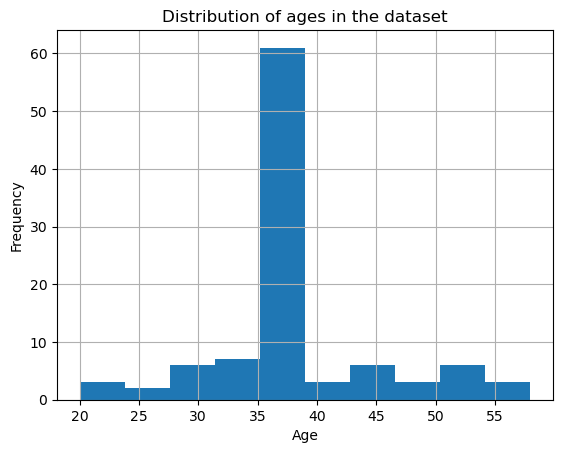

In [57]:
df['Age'].hist()
xlabel = plt.xlabel('Age')
ylabel = plt.ylabel('Frequency')
title = plt.title('Distribution of ages in the dataset')


<Axes: >

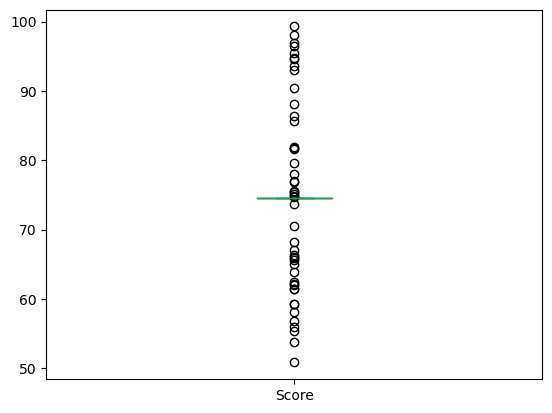

In [67]:
df['Score'].plot.box()

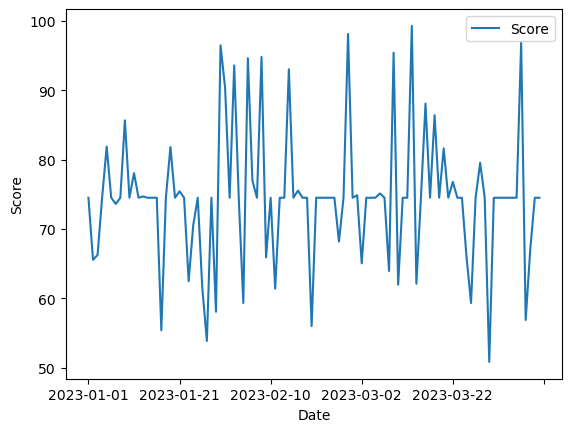

In [72]:
df.plot(kind='line', x='Date', y='Score')
xlabel = plt.xlabel('Date')
ylabel = plt.ylabel('Score')